In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = 'epi_paga_nov2_2021.h5ad'  # the file that will store the analysis results
# ok so to make this code publishable, use the old code for stuff (i.e. epi_paga.h5ad) from just EE,eoe, resection stuff, I don't think its really all that necessary to incldue south afria data here

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 6.2.1
anndata             0.7.4
appnope             0.1.0
backcall            0.1.0
cairo               1.18.2
cffi                1.13.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.9.0
importlib_metadata  0.23
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.0
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.8.3
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.21.2
packaging           20.4
pandas              1.3.3
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
sc.settings.set_figure_params(dpi=80)

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures

In [4]:
epi = sc.read_loom("epi.loom")
epi.write(results_file)

/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'ClusterName' as categorical
... storing 'HAART' as categorical
... storing 'HIV_HTLV_' as categorical
... storing 'SCT_snn_res_0_2' as categorical
... storing 'SCT_snn_res_0_4' as categorical
... storing 'SCT_snn_res_0_8' as categorical
... storing 'Sex' as categorical
... storing 'Visual_Enteropathy' as categorical
... storing 'cell_types' as categorical
... storing 'disease' as categorical
... storing 'orig_ident' as categorical
... storing 'patient' as categorical
... storing 'region' as categorical
... storing 'seurat_clusters' as categorical
... storing 'status_of_disease' as categorical
... storing 'study' as categorical
... storing 'tier1' as categorical
... storing 'tier2' as categorical
... stori

In [4]:
epi = sc.read(results_file)

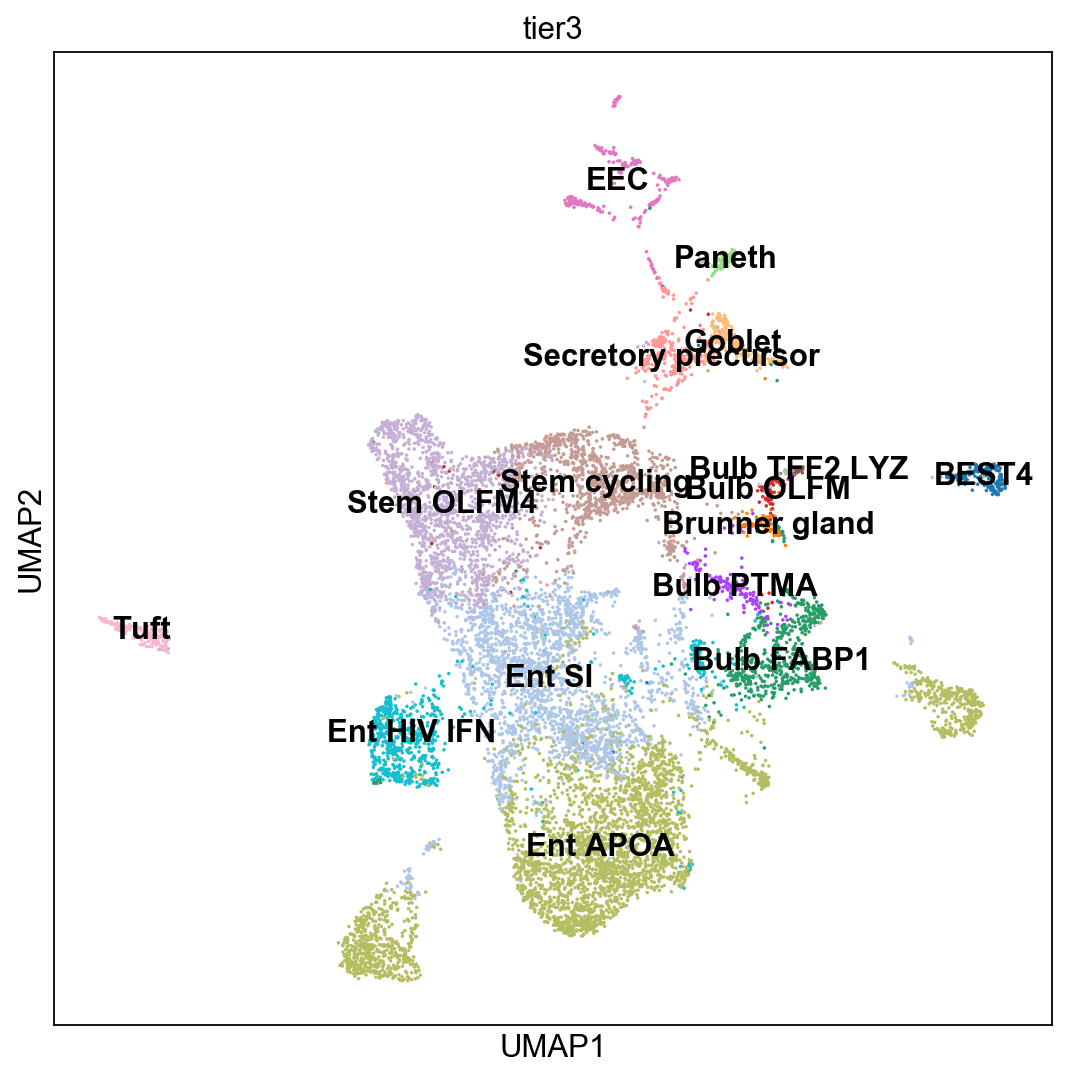

In [6]:
epi.layers["counts"] = epi.X.copy()
epi.X = epi.layers["norm_data"].copy()
epi.obsm["X_pca"] = epi.obsm["pca_cell_embeddings"]
epi.obsm["X_umap"] = epi.obsm["umap_cell_embeddings"]
sc.pl.umap(epi,color=["tier3"],legend_loc="on data")

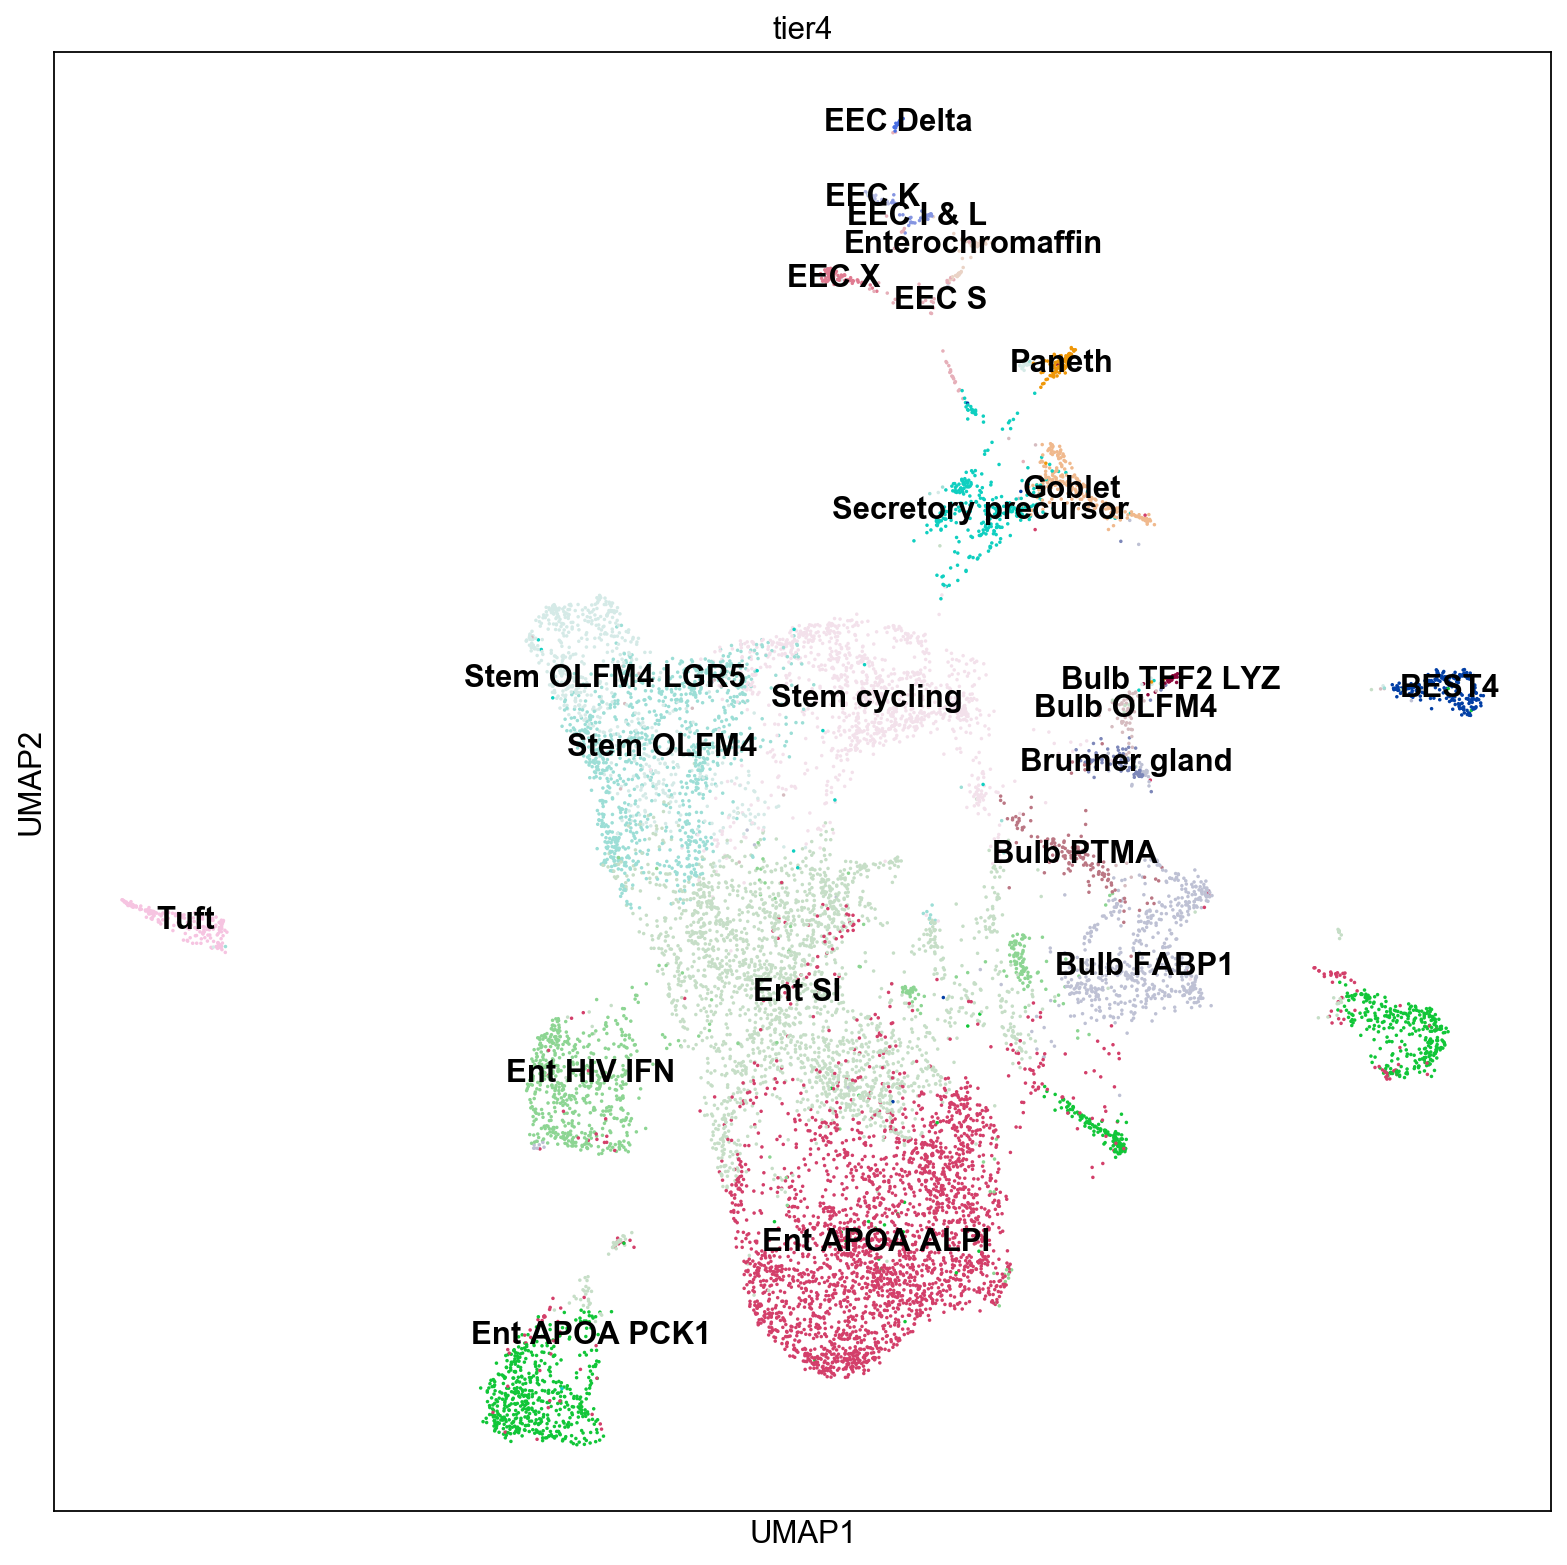

In [42]:
sc.pl.umap(epi,color=["tier4"],legend_loc="on data")

# Running PAGA

In [7]:
0.5*(epi.obs.shape[0])**0.5

54.660314671615275

In [12]:
sc.pp.neighbors(epi, n_neighbors=55)  # generate a neighborhood graph of single cells
# sc.tl.draw_graph(epi)  # draw this graph using standard drawing algorithms

computing neighbors
    using 'X_pca' with n_pcs = 50


/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/umap/rp_tree.py:719: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"
/opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../opt/miniconda3/envs/single_cell/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


SystemError: CPUDispatcher(<function make_nn_descent.<locals>.nn_descent at 0x7fb623dae1e0>) returned a result with an error set

In [10]:
epi.write(results_file)

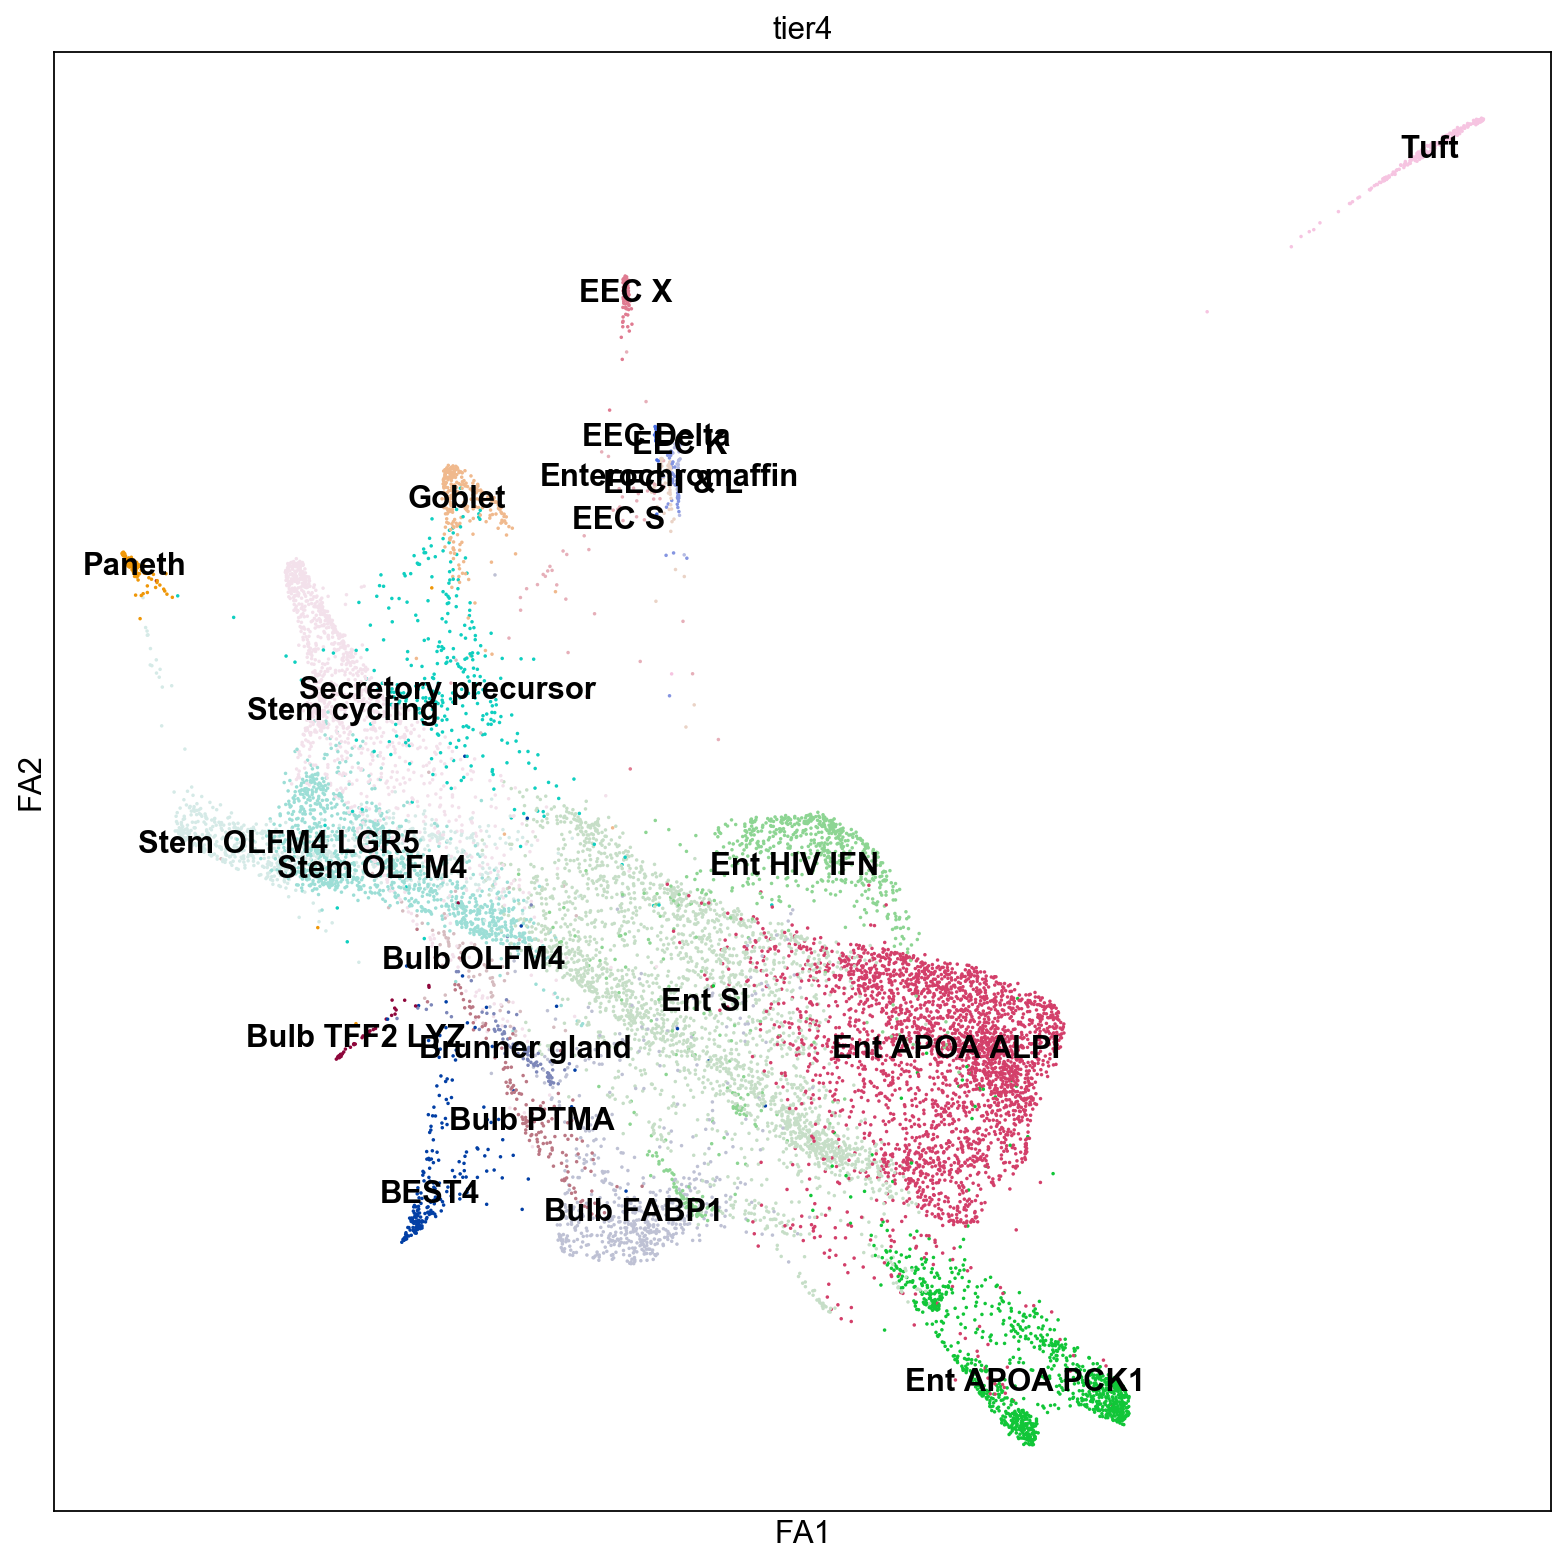

In [57]:
sc.pl.draw_graph(epi, color=['tier4'], legend_loc='on data')

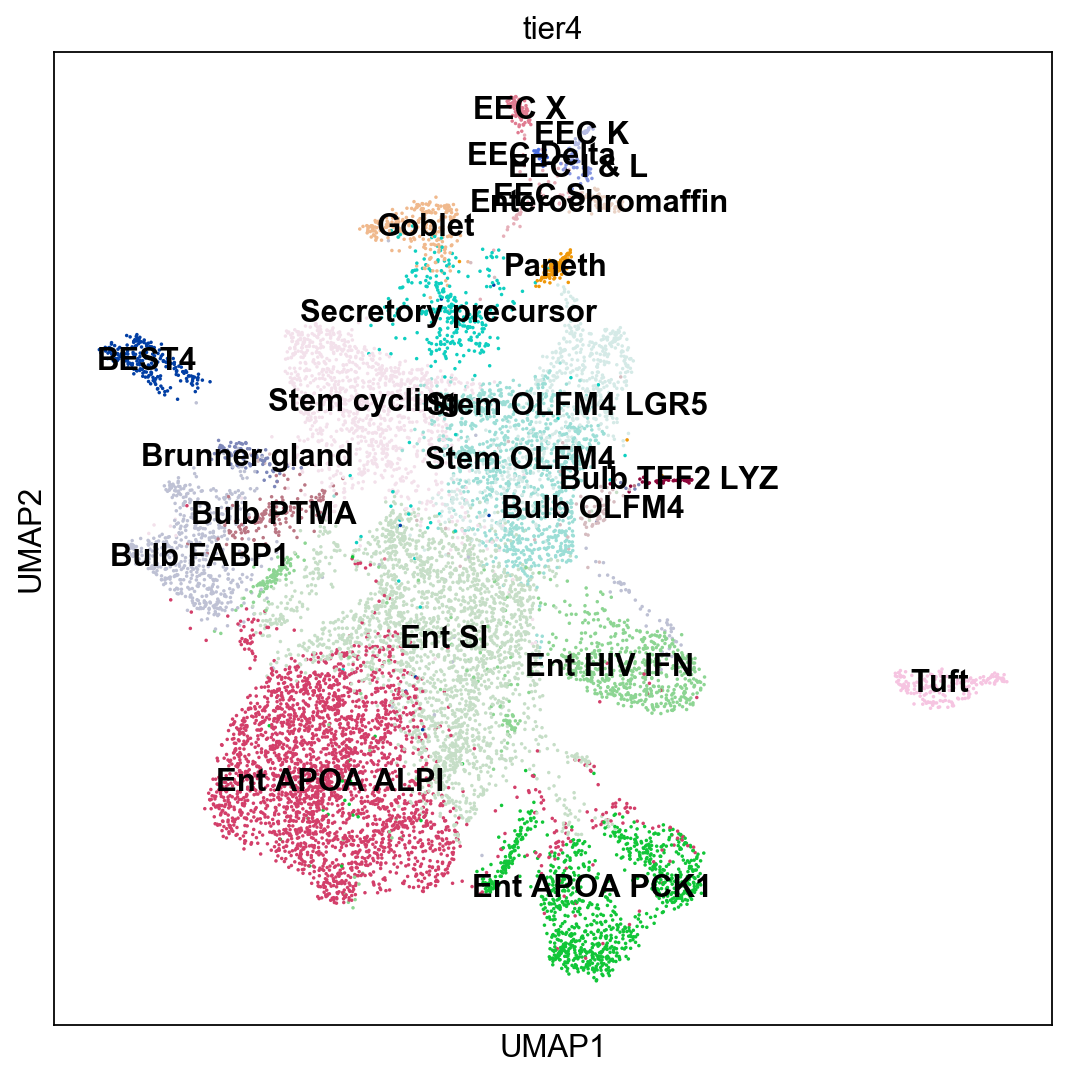

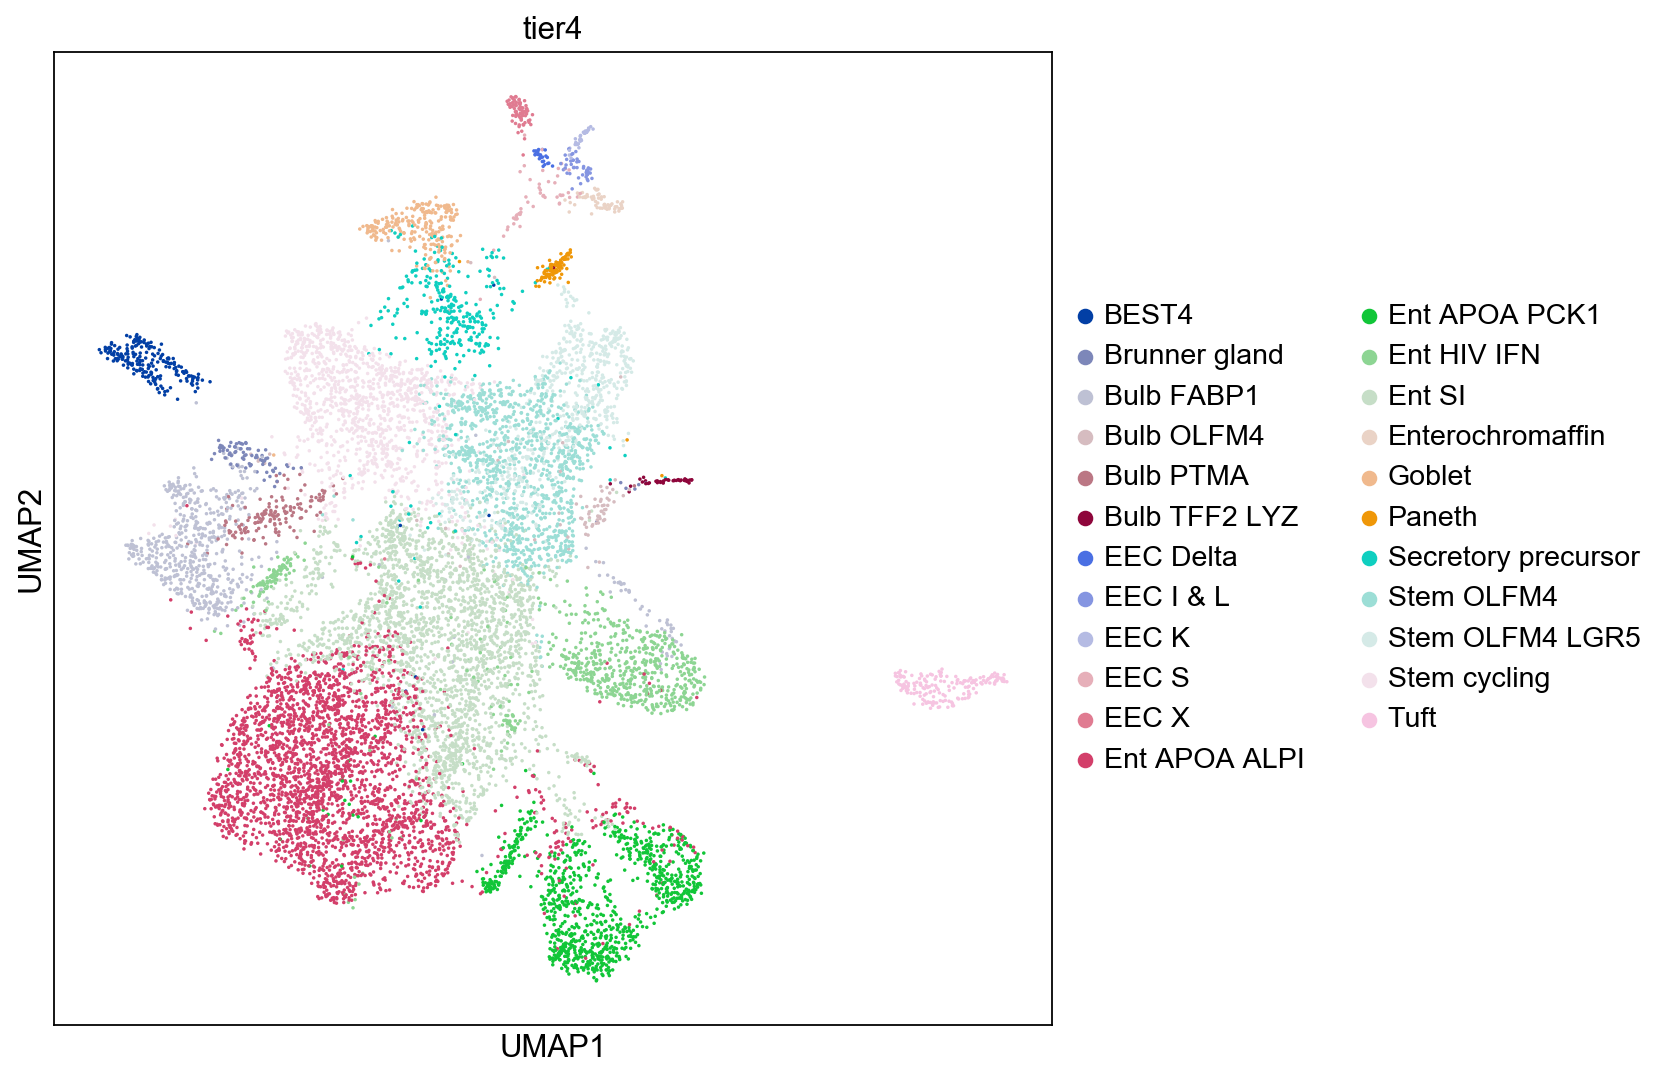

In [15]:
# sc.tl.umap(epi)
sc.pl.umap(epi,color="tier4",legend_loc="on data")
sc.pl.umap(epi,color="tier4")

In [11]:
sc.tl.paga(epi, groups='tier4',)

ValueError: You need to run `pp.neighbors` first to compute a neighborhood graph.

In [11]:
epi.write(results_file)

In [53]:
plt.rcParams['figure.figsize']=(12,12)

--> added 'pos', the PAGA positions (adata.uns['paga'])


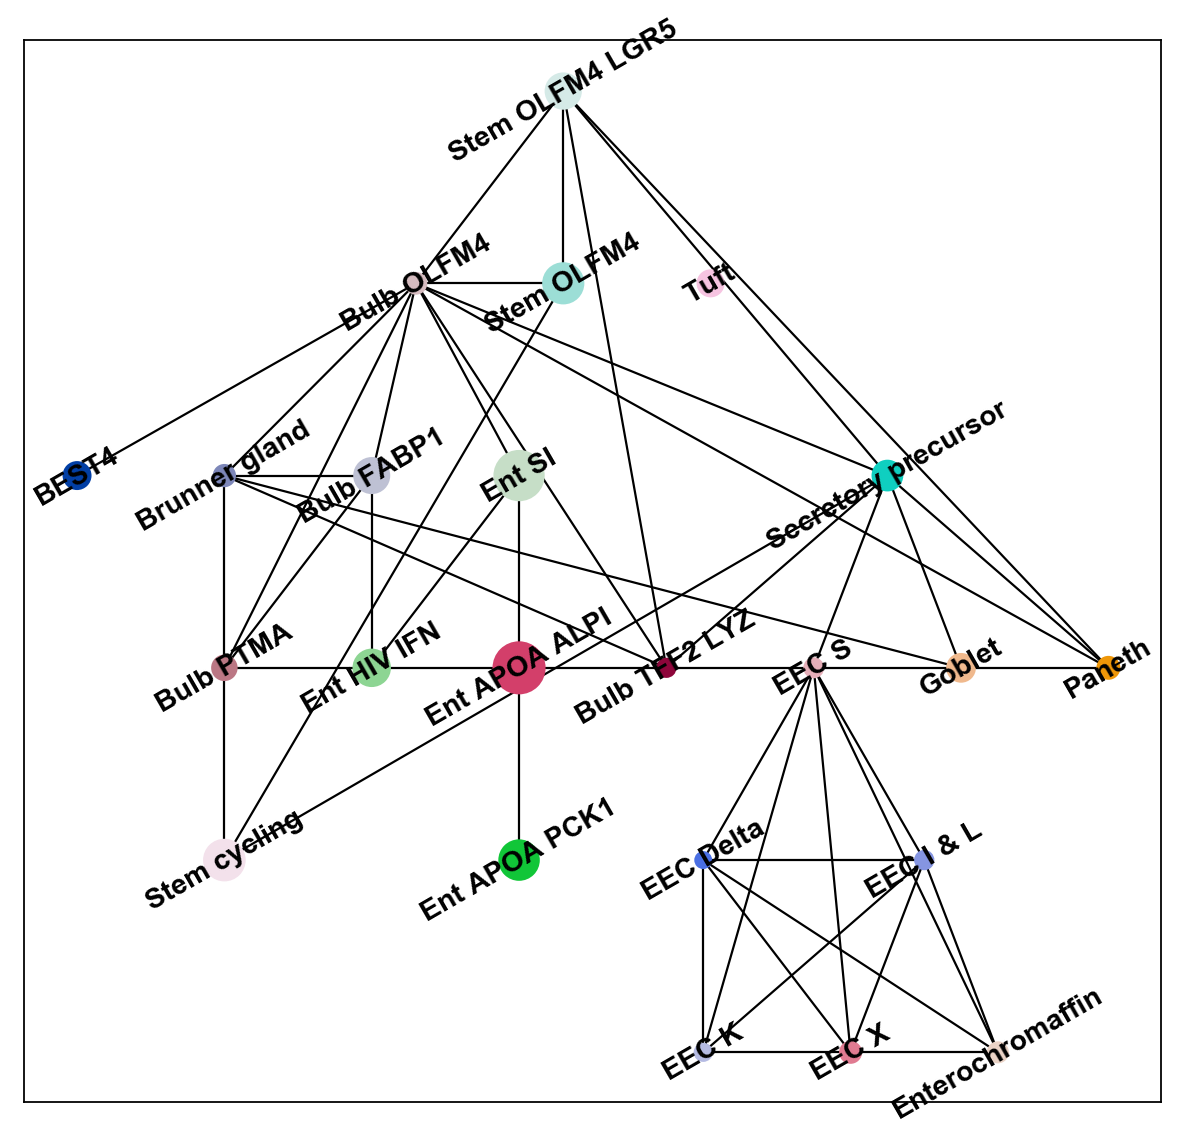

In [24]:
sc.pl.paga(epi, layout='rt', root=[20],threshold=0.3,max_edge_width=1,
          text_kwds={'rotation': 30})

--> added 'pos', the PAGA positions (adata.uns['paga'])


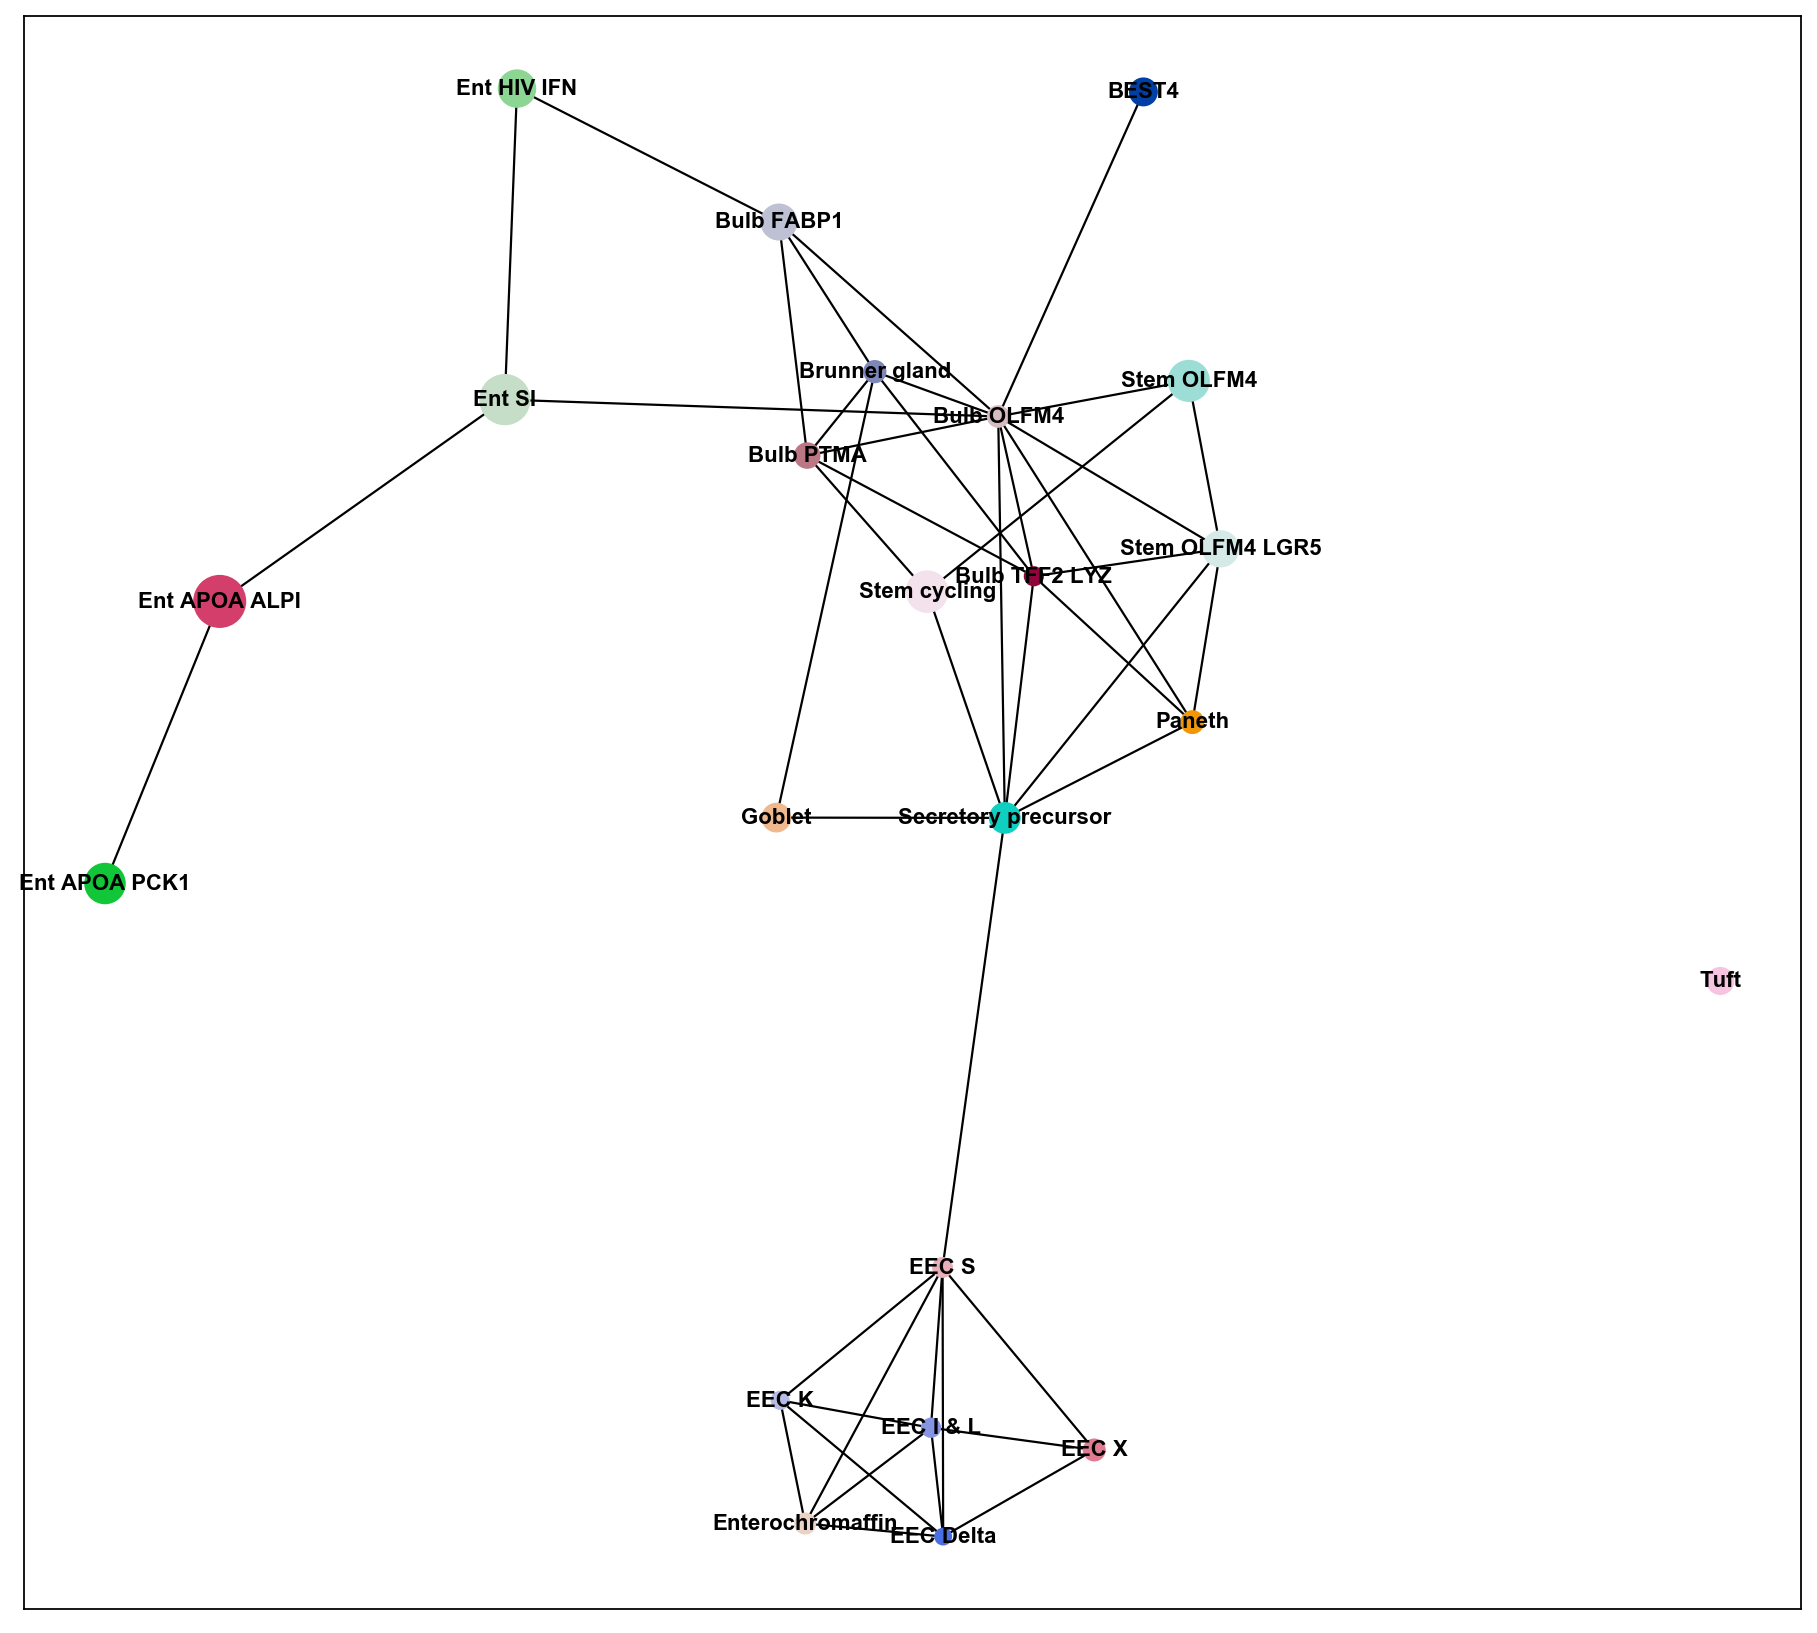

In [54]:
sc.pl.paga(epi,text_kwds={'rotation': 0},threshold=0.3,max_edge_width=1,fontsize=10,color='tier4')
#           save="paga_plain.pdf",)

In many ways makes sense that TA are the start of the differentiation, 

In [60]:
epi.write(results_file)

## exporting the data that I need to R for plotting paga results better

In [27]:
paga_positions = epi.uns['paga']['pos']

In [29]:
pp = pd.DataFrame({'x':paga_positions[:,0],
                  'y':paga_positions[:,1],
                  'tier3':epi.obs['tier3'].cat.categories.values})

In [30]:
pp.to_csv("paga_positions.csv")